In [1]:
import matplotlib.pyplot as plt
import numpy as np

<Figure size 432x288 with 0 Axes>

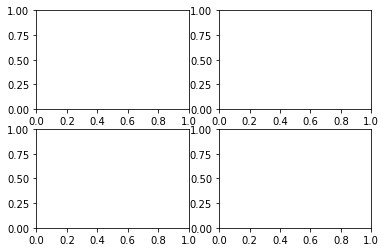

In [3]:
fig = plt.figure()
fig.suptitle('No axes on this figure')
fig, ax_lst = plt.subplots(2,2) # figure with 2x2 grid of axes

In [30]:
# up, down ramp - DS p.38
#tmax = 53e6  # wrong.  see total_time below
# Sampling clock is input clock - 28MHz. 
# Each half-cycle of fs a sample (14 bits) comes out. (Table 14, p.64)
fs = 28e6
ts = 1.0 / fs 
t_pos_step_f = fs / (2**(7 - 4))
t_neg_step_f = fs / (2**(7 - 7))
print(fs / 8)
print(fs)

3500000.0
28000000.0


In [18]:
start_gain = 6 + 80*0.125  # 16dB
# stop gain is the top of the ramp.  Must be larger than start gain.
# Gain N must be 0 to 319.  A value outside this range automatically goes to 0.
stop_gain = 6 + 220*0.125  # 33.5dB

In [21]:
# Time for entire image frame:
total_time = (1.0 / fs) * 2048
print(total_time)

7.314285714285714e-05


In [23]:
ramp_up_time = (33.5 - 16) / 0.125 / t_pos_step_f
print(ramp_up_time)

4e-05


In [24]:
ramp_down_time = (33.5 - 16) / 0.125 / t_neg_step_f
print(ramp_down_time)

5e-06


In [35]:
# fs period is 35.7ns
1/28.0

0.03571428571428571

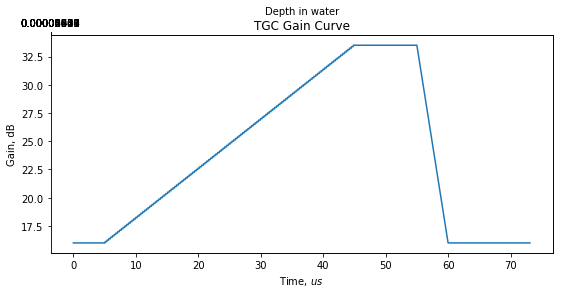

In [75]:
t = np.arange(0, total_time, total_time / 2048)
gain = []
gainv = start_gain
cnt = 0
for tn in t:
    cnt += 1
    if tn < 5e-6:
        gainv = start_gain
        gain.append(gainv)
    elif tn < 50e-6 and gainv < stop_gain and cnt % 8 == 0:
        gainv += 0.125
        gain.append(gainv)
    elif tn > 55e-6 and gainv > start_gain:
        gainv -= 0.125
        gain.append(gainv)
    else:
        gain.append(gainv)
        

fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(111)

#ax2 = ax1.twiny()
#depth = []
#for i, n in enumerate(t):
#    if i % 256 == 0:
#        depth.append(n)
#ax2.set_xticks(depth)
#ax2.set_xlabel(r'Depth in water')

ax1.plot(t*10e5, gain)
ax1.set_xlabel(r'Time, $us$')
ax1.set_ylabel('Gain, dB')

ax1.set_title("TGC Gain Curve")

plt.grid()
plt.show()
        

In [74]:
len(depth)


8